In [3]:
class KnnClassifier:
    def __init__(self, train_images, train_labels):
        self.train_images = train_images
        self.train_labels = train_labels

    def classify_image(self, test_image, num_neighbors = 3, metric ='l2'):
        d = np.apply_along_axis(lambda img: self.distance(test_image, img, metric), axis=(1), arr=self.train_images)
        dl = zip(d, self.train_labels)
        dl = sorted(dl, key=lambda x: x[0])
        dl = dl[:num_neighbors]

        unique, counts = np.unique(dl, return_counts=True)

        return unique[np.argmax(counts)]

    def distance(self, x, y, metric):
        if metric == 'l1':
            return np.sum(abs(x-y))
        else:
            return np.sqrt(np.sum((x-y) * (x-y)))

    def classify_images(self, test_images, num_neighbors=3, metric='l2'):
        return np.apply_along_axis(lambda image: self.classify_image(image, num_neighbors, metric), arr=test_images, axis=1)


    def accuracy_score(self, test_images, test_labels, num_neighbors=3, metric='l2'):
        algo_labels = self.classify_images(test_images, num_neighbors, metric)

        correct = np.sum(algo_labels == test_labels)
        total = np.size(test_labels)

        return (correct / total)

[0.884, 0.898, 0.896, 0.88, 0.88]


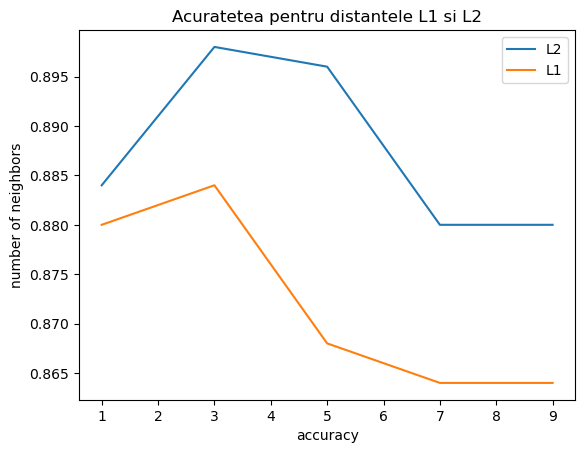

In [4]:
import numpy as np
from matplotlib import pyplot as plt

train_images = np.loadtxt('data/train_images.txt')  # incarcam imaginile
train_labels = np.loadtxt('data/train_labels.txt', 'int', converters=float)


test_images = np.loadtxt('data/test_images.txt')  # incarcam imaginile
test_labels = np.loadtxt('data/test_labels.txt', 'int', converters=float)


knn = KnnClassifier(train_images, train_labels)

neighbors = [1, 3, 5, 7, 9]
scoresL2 = [knn.accuracy_score(test_images, test_labels, x, "l2") for x in neighbors]
scoresL1 = [knn.accuracy_score(test_images, test_labels, x, "l1") for x in neighbors]

print(scoresL2)

plt.title("Acuratetea pentru distantele L1 si L2")
plt.xlabel("accuracy")
plt.ylabel("number of neighbors")
plt.plot(neighbors, scoresL2, label="L2")
plt.plot(neighbors, scoresL1, label="L1")
plt.legend()
plt.show()